Neighborhood_Type
Suburban    4868.570341
Urban       5482.775942
Name: Rental_Price, dtype: float64


<ipython-input-18-8036ebda7274>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  luxury_apartments['Neighborhood_Type'] = luxury_apartments['Neighborhood'].apply(
<ipython-input-18-8036ebda7274>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_rental_price_by_type.index, y=average_rental_price_by_type.values, palette="viridis")


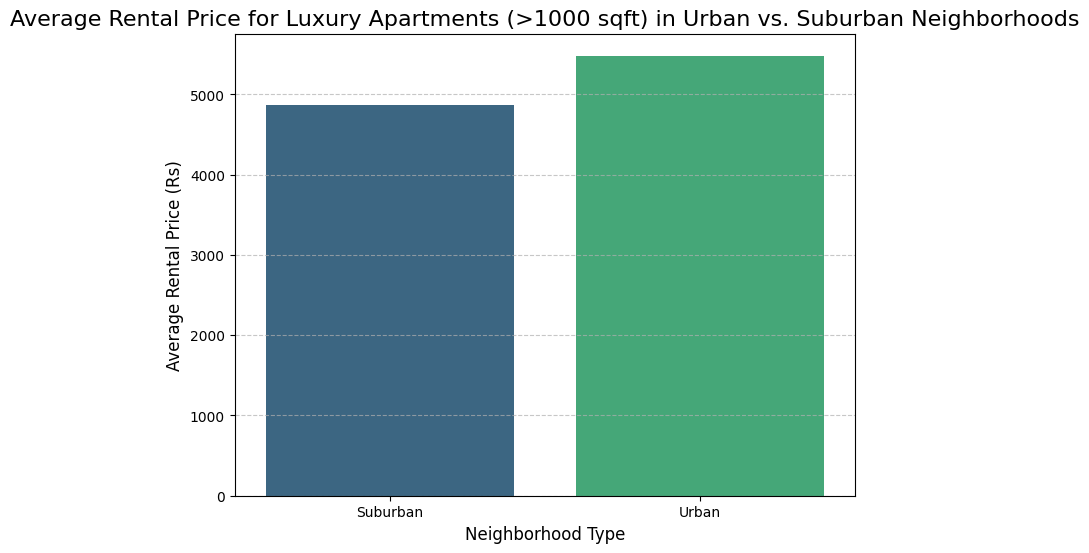

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('sample_data/Q1_Dataset.csv')


df = df.drop_duplicates()
df['Rental_Price'] = pd.to_numeric(df['Rental_Price'], errors='coerce')
df['Size_in_Sqft'] = pd.to_numeric(df['Size_in_Sqft'], errors='coerce')
df = df.dropna(subset=['Rental_Price', 'Size_in_Sqft', 'Neighborhood'])


df['Neighborhood'] = df['Neighborhood'].str.strip().str.title()

# Filter for luxury apartments (Size_in_Sqft > 1000)
luxury_apartments = df[df['Size_in_Sqft'] > 1000]

# Define Urban and Suburban Neighborhoods
urban_neighborhoods = ['Downtown', 'Midtown', 'Uptown']
luxury_apartments['Neighborhood_Type'] = luxury_apartments['Neighborhood'].apply(
    lambda x: 'Urban' if x in urban_neighborhoods else 'Suburban'
)

# Group by Neighborhood Type and calculate the average rental price
average_rental_price_by_type = luxury_apartments.groupby('Neighborhood_Type')['Rental_Price'].mean()

# Print the average rental prices
print(average_rental_price_by_type)

# Visualize
plt.figure(figsize=(8, 6))
sns.barplot(x=average_rental_price_by_type.index, y=average_rental_price_by_type.values, palette="viridis")
plt.title("Average Rental Price for Luxury Apartments (>1000 sqft) in Urban vs. Suburban Neighborhoods", fontsize=16)
plt.xlabel("Neighborhood Type", fontsize=12)
plt.ylabel("Average Rental Price (Rs)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

